# Loading the model to visualize predictions on random images.

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
# Load the trained model
cnn_model = load_model('cnn_bounding_box_model.h5')

#We do this since the input size of our images is 224,224
# Define input size the model expects
input_size = (224, 224)

In [3]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, input_size)  # Resize to match model input
    img_normalized = img_resized.astype(np.float32) / 255.0  # Normalize the image
    img_input = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    return img, img_input

In [4]:
def visualize_prediction(image_path):
    # Load and preprocess the image
    original_img, img_input = preprocess_image(image_path)
    
    # Predict the bounding box
    predicted_bbox = cnn_model.predict(img_input)[0]
    
    # Denormalize and extract bbox coordinates
    height, width, _ = original_img.shape
    x, y, w, h = predicted_bbox * [width, height, width, height]
    
    # Draw the bounding box directly on the image
    cv2.rectangle(original_img, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)
    
    # Display the result using matplotlib
    plt.imshow(original_img)
    plt.axis('off')
    plt.title('Predicted Bounding Box')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


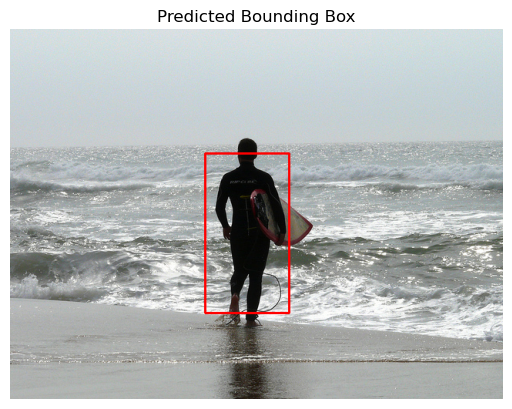

In [7]:
# Example usage
image_path = '/Users/harshavardhan/data/coco_subset/000000001369.jpg'  # Replace with your image path
visualize_prediction(image_path)